In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from faker import Faker

# Set seed for reproducibility
np.random.seed(42)
fake = Faker()

In [2]:
# Dataset size
num_records = 1000

# Categories
regions = ['London', 'Manchester', 'Birmingham', 'Leeds', 'Glasgow']
genders = ['Male', 'Female']
segments = ['Corporate', 'Enterprise', 'SME']
categories = ['Finance', 'Technology', 'Marketing', 'Leadership', 'Data Science']

book_titles = [
    "Corporate Finance Guide",
    "Advanced Python for Business",
    "Marketing Strategy 2026",
    "Leadership Principles",
    "Data Analytics Handbook"
]

In [3]:
data = []

for i in range(num_records):
    
    unit_cost = np.random.uniform(5, 30)
    unit_price = unit_cost + np.random.uniform(5, 20)
    
    units_sold = np.random.randint(1, 50)
    
    revenue = unit_price * units_sold
    profit = (unit_price - unit_cost) * units_sold
    profit_margin = profit / revenue
    
    record = {
        "Customer_ID": fake.uuid4(),
        "Customer_Age": np.random.randint(22, 65),
        "Customer_Gender": np.random.choice(genders),
        "Customer_Region": np.random.choice(regions),
        "Corporate_Segment": np.random.choice(segments),
        "Book_Category": np.random.choice(categories),
        "Book_Title": np.random.choice(book_titles),
        "Units_Sold": units_sold,
        "Unit_Cost": round(unit_cost, 2),
        "Unit_Price": round(unit_price, 2),
        "Revenue": round(revenue, 2),
        "Profit": round(profit, 2),
        "Profit_Margin": round(profit_margin, 2),
        "Purchase_Date": fake.date_between(start_date='-2y', end_date='today')
    }
    
    data.append(record)

df = pd.DataFrame(data)

In [4]:
df.head()

,Customer_ID,Customer_Age,Customer_Gender,Customer_Region,Corporate_Segment,Book_Category,Book_Title,Units_Sold,Unit_Cost,Unit_Price,Revenue,Profit,Profit_Margin,Purchase_Date
0,e92b3f70-b2ce-4241-82e5-341c86f17633,29,Male,Glasgow,SME,Technology,Marketing Strategy 2026,43,14.36,33.62,1445.84,828.21,0.57,2025-10-26
1,9ef2cfc8-7e0b-4954-90af-9b8081fc55cc,61,Female,Birmingham,Enterprise,Data Science,Advanced Python for Business,36,7.50,19.39,697.97,427.99,0.61,2024-06-28
2,3ee0199f-9443-4250-b46a-615f51e854f7,42,Male,Leeds,Enterprise,Data Science,Leadership Principles,2,23.05,42.13,84.26,38.16,0.45,2024-09-20
3,426fe28c-d80b-42e1-82ba-1f76b8311493,49,Female,Birmingham,SME,Leadership,Corporate Finance Guide,42,5.58,18.45,774.82,540.61,0.70,2024-08-12
4,22a3eab1-7748-4b37-810d-584f02d85da4,30,Male,Manchester,Corporate,Leadership,Advanced Python for Business,21,6.16,20.27,425.76,296.38,0.70,2025-06-11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        1000 non-null   object 
 1   Customer_Age       1000 non-null   int64  
 2   Customer_Gender    1000 non-null   object 
 3   Customer_Region    1000 non-null   object 
 4   Corporate_Segment  1000 non-null   object 
 5   Book_Category      1000 non-null   object 
 6   Book_Title         1000 non-null   object 
 7   Units_Sold         1000 non-null   int64  
 8   Unit_Cost          1000 non-null   float64
 9   Unit_Price         1000 non-null   float64
 10  Revenue            1000 non-null   float64
 11  Profit             1000 non-null   float64
 12  Profit_Margin      1000 non-null   float64
 13  Purchase_Date      1000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [6]:
df.to_csv("corporate_books_sales_dataset.csv", index=False)
print("Dataset saved successfully.")

Dataset saved successfully.


In [7]:
print("Total Revenue:", df["Revenue"].sum())
print("Total Profit:", df["Profit"].sum())

Total Revenue: 753383.87
Total Profit: 316673.65


In [8]:
df.groupby("Book_Category")["Profit_Margin"].mean()

Book_Category
Data Science    0.441333
Finance         0.427079
Leadership      0.449005
Marketing       0.436923
Technology      0.420052
Name: Profit_Margin, dtype: float64

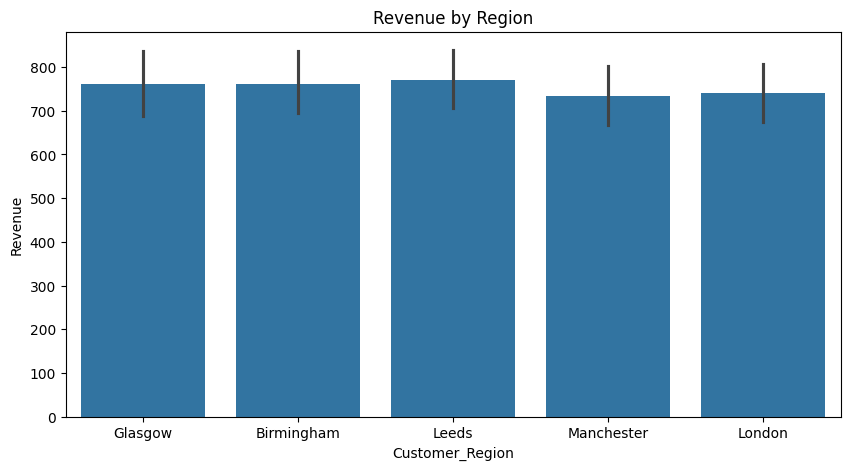

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Customer_Region", y="Revenue")
plt.title("Revenue by Region")
plt.show()

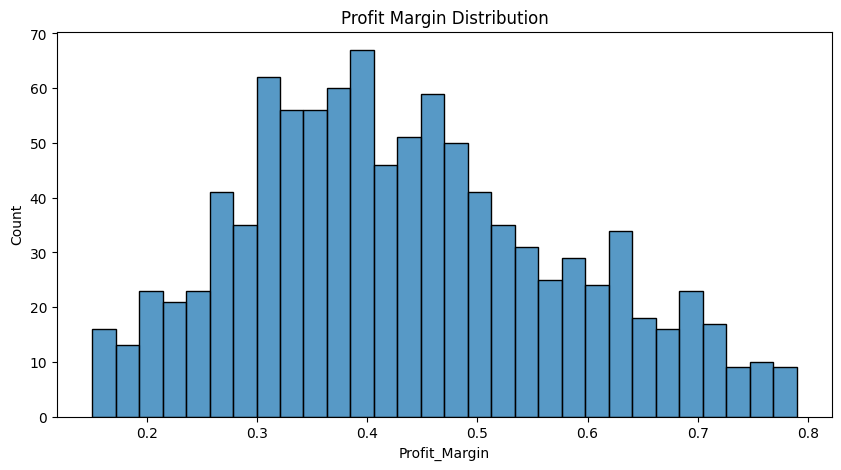

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df["Profit_Margin"], bins=30)
plt.title("Profit Margin Distribution")
plt.show()

In [11]:
df.groupby("Customer_Gender")["Profit"].mean()

Customer_Gender
Female    311.734332
Male      320.949478
Name: Profit, dtype: float64

In [12]:
df["Age_Group"] = pd.cut(df["Customer_Age"],
                         bins=[20,30,40,50,60,70],
                         labels=["20-30","30-40","40-50","50-60","60-70"])

df.groupby("Age_Group")["Profit"].mean()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_74152/21779122.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Profit"].mean()


Age_Group
20-30    330.217638
30-40    326.187942
40-50    293.270506
50-60    318.333077
60-70    324.681750
Name: Profit, dtype: float64

In [13]:
df.groupby("Corporate_Segment")[["Revenue","Profit"]].sum()

,Revenue,Profit
Corporate_Segment,,
Corporate,249393.47,104172.11
Enterprise,244852.62,104272.50
SME,259137.78,108229.04


In [14]:
df.groupby("Book_Title")["Profit"].sum().sort_values(ascending=False)

Book_Title
Data Analytics Handbook         71883.77
Leadership Principles           69435.10
Marketing Strategy 2026         59638.44
Corporate Finance Guide         58028.65
Advanced Python for Business    57687.69
Name: Profit, dtype: float64